<a href="https://colab.research.google.com/github/elflan12/spotify_seasons/blob/main/Spotify_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 424 kB/s 
     |████████████████████████████████| 246 kB 26.1 MB/s 
     |████████████████████████████████| 138 kB 28.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
client_id = "ccb7071383a64d68ae78ca2a1922f939"
client_secret = "af5afee6a538454a852bf5e577eb2ced"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [4]:
playlist_link = "spotify:playlist:37i9dQZF1EM2Qkk2MTLxJE"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [18]:
uri = playlist_URI
username = uri.split(':')[2]
playlist_id = uri.split(':')[2]

In [19]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [20]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])


In [21]:
features = sp.audio_features(playlist_tracks_id)

In [22]:
import numpy as np
import pandas as pd

In [28]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [ ]:
#get the audio features of the songs in the playlist to store in dataframe

In [39]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
features_df['id'] = playlist_tracks_id

In [40]:
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness', 
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]

features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,
35Ug04U7NH8fQTYqnIiuLj,35Ug04U7NH8fQTYqnIiuLj,The Queen of Hearts,Ezra Furman,[Ezra Furman],0.493,0.503,7,-8.887,1,0.351,0.000178,0.1110,0.541,203.819,297000,4
3cBBH5fehQi4o4UvMqUpOP,3cBBH5fehQi4o4UvMqUpOP,You Don't Have to be Lonely,The Undercover Dream Lovers,[The Undercover Dream Lovers],0.825,0.695,0,-5.767,1,0.192,0.728000,0.1330,0.847,119.999,245400,4
6LJBbJ4LyoVlhybwS2v3ET,6LJBbJ4LyoVlhybwS2v3ET,But You,Alexandra Savior,[Alexandra Savior],0.368,0.611,11,-6.917,0,0.455,0.198000,0.0952,0.199,80.096,173523,4
0xTSTNqREWKDIndmR9QSSc,0xTSTNqREWKDIndmR9QSSc,L.A. (Remix feat. Westerman),Amen Dunes,"[Amen Dunes, Westerman]",0.624,0.645,7,-9.362,1,0.117,0.111000,0.0884,0.193,133.044,364520,4
11VwZwNF29HrqwalYUMitb,11VwZwNF29HrqwalYUMitb,Pale Blue Eyes,The Velvet Underground,[The Velvet Underground],0.637,0.107,5,-18.759,1,0.911,0.001460,0.1030,0.296,82.879,339533,4


In [ ]:
#Data Exploration

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#count plot will tell what artists have most songs in the playlist

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 <a list of 83 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0, flags=flags)


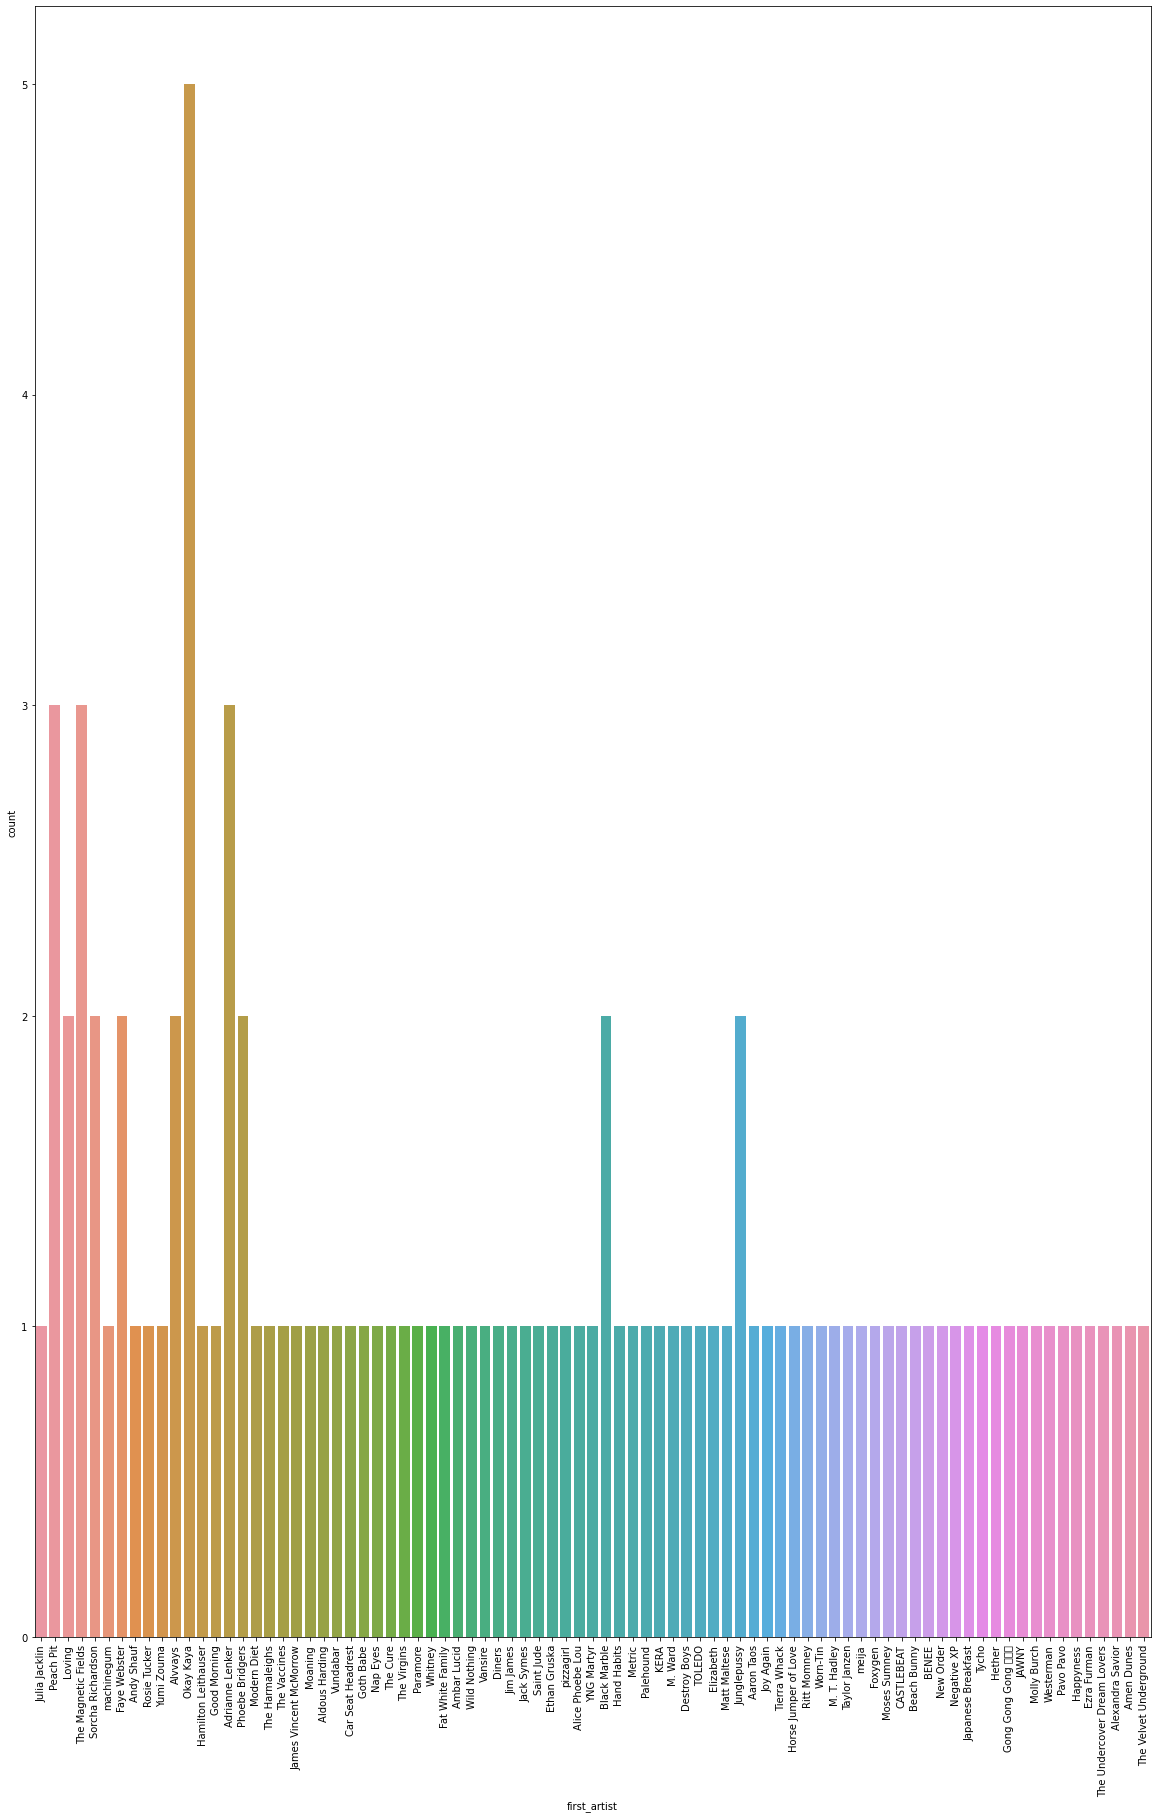

In [44]:
plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [ ]:
#audio analysis

In [ ]:
#spotify will analyze a song on the basis of bars, beats, sections,
#tatum and segments. 

In [45]:
num_bars = []
num_sections = []
num_segments = []

for i in range (0, len(features_df['id'])):
  analysis = sp.audio_analysis(features_df.iloc[i]['id'])
  num_bars.append(len(analysis['bars'])) #beats/time sig
  num_sections.append(len(analysis['sections']))
  num_segments.append(len(analysis['segments']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 0, 'num_segments')

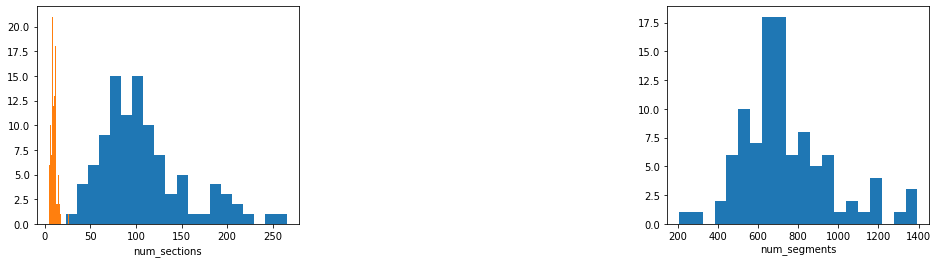

In [47]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,1)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')